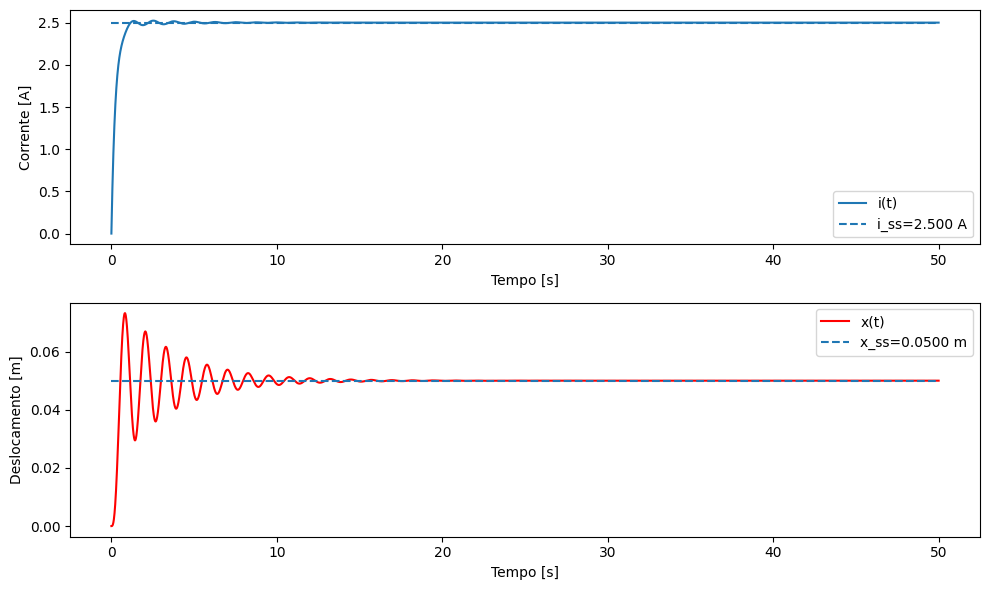

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
R = 2.0; L = 0.5; K = 1.0
k = 50.0; m = 2.0; b = 1.0
V_const = 5.0

def V(t):
    return V_const

# Sistema (forma reduzida: estado = [i, x, dx])
def sistema_reduzido(t, y):
    i, x, dx = y
    di_dt = (V(t) - R*i - K*dx) / L
    d2x_dt2 = (K*i - k*x - b*dx) / m
    return [di_dt, dx, d2x_dt2]

# Condições iniciais
y0 = [0.0, 0.0, 0.0]

# Simular por mais tempo para ver o regime permanente
t_span = (0, 50)   # 50 s para garantir convergência
t_eval = np.linspace(t_span[0], t_span[1], 5000)

sol = solve_ivp(sistema_reduzido, t_span, y0, t_eval=t_eval)

# Equilíbrio previsto
i_ss = V_const / R
x_ss = (K * V_const) / (R * k)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(sol.t, sol.y[0], label='i(t)')
plt.hlines(i_ss, sol.t[0], sol.t[-1], linestyles='--', label=f'i_ss={i_ss:.3f} A')
plt.xlabel('Tempo [s]')
plt.ylabel('Corrente [A]')
plt.legend()

plt.subplot(2,1,2)
plt.plot(sol.t, sol.y[1], label='x(t)', color='r')
plt.hlines(x_ss, sol.t[0], sol.t[-1], linestyles='--', label=f'x_ss={x_ss:.4f} m')
plt.xlabel('Tempo [s]')
plt.ylabel('Deslocamento [m]')
plt.legend()

plt.tight_layout()
plt.show()
